In [1]:
from sklearnex import patch_sklearn

patch_sklearn()

import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.classifier import ROCAUC, ConfusionMatrix
from sklearn.metrics import classification_report

from drowsiness_detection.data import (session_type_mapping, load_experiment_objects,
                                       load_preprocessed_train_test_splits, label_names_dict)
from drowsiness_detection.visualize import (plot_roc_curve_from_log_dir,
    plot_learning_curve_from_log_dir)
from drowsiness_detection import config

plt.rcParams["figure.figsize"] = 14, 7

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
# fixed experiment params
# EXPERIMENT_IDS = (31, 32)
EXPERIMENT_IDS = (30, 31, 32)


m## Plot ROC Curve of best model for 10, 20 and 60 seconds data

KeyboardInterrupt: 

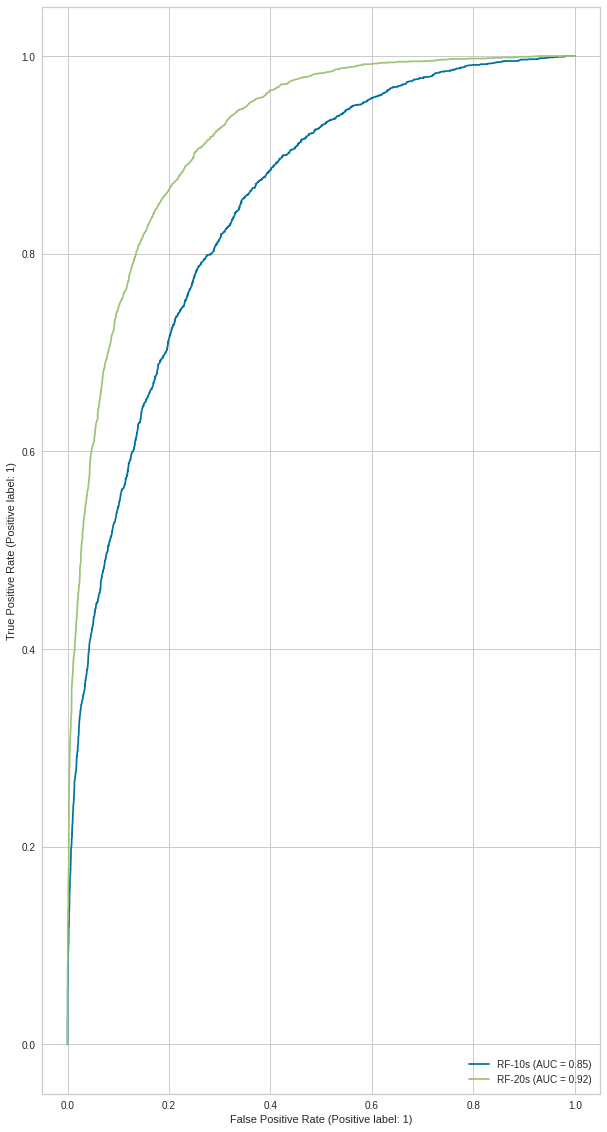

In [6]:
fig, ax = plt.subplots()

for experiment_id in EXPERIMENT_IDS:
    plot_roc_curve_from_log_dir(experiment_id=experiment_id, ax=ax, pos_label=1)

### Plot learning curve of best model for 10, 20 and 60 seconds data


In [3]:
% load_ext autoreload
% autoreload 2

UsageError: Line magic function `%` not found.


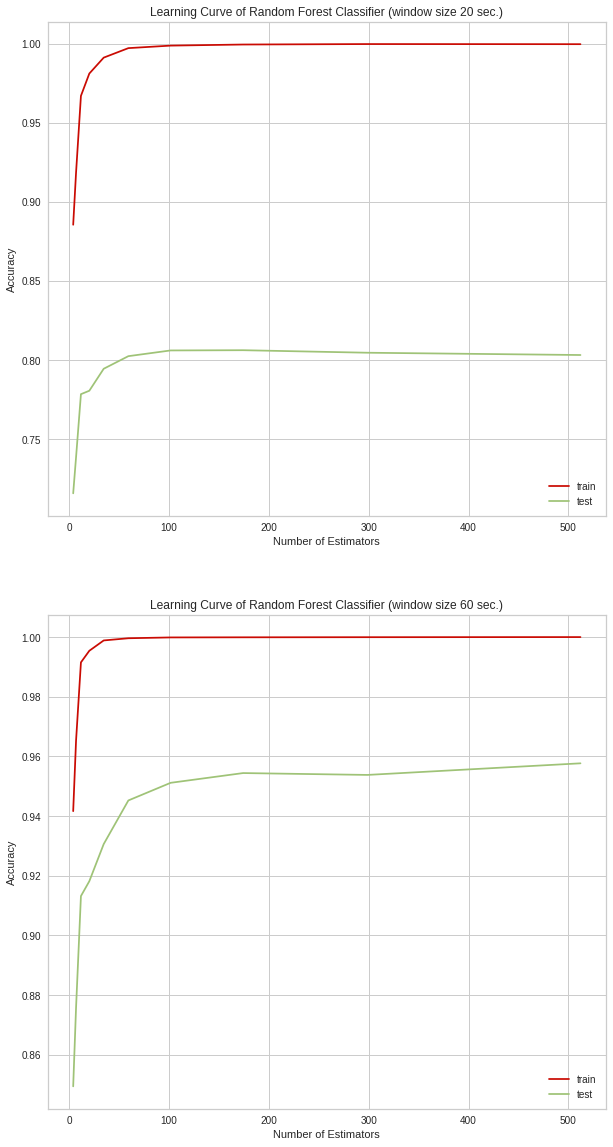

In [4]:
plt.rcParams["figure.figsize"] = 10, 20

n_estimator_options = np.logspace(2, 9, num=10, base=2)
_, axes = plt.subplots(len(EXPERIMENT_IDS), 1)
for experiment_id, ax in zip(EXPERIMENT_IDS, axes):
    plot_learning_curve_from_log_dir(experiment_id=experiment_id,
                                     n_estimator_options=n_estimator_options, ax=ax)


### Plot classification report of best model for 10, 20 and 60 seconds data


In [8]:
for experiment_id in EXPERIMENT_IDS:
    exp_config, best_estimator, _ = load_experiment_objects(experiment_id=experiment_id)

    window_size = exp_config["window_in_sec"]
    config.set_paths(30, window_size)

    # load data
    X_train, X_test, y_train, y_test = load_preprocessed_train_test_splits(
        data_path=config.PATHS.WINDOW_FEATURES,
        exclude_sess_type=session_type_mapping[exp_config["exclude_by"]],
        num_targets=exp_config["num_targets"],
        seed=exp_config["seed"],
        test_size=exp_config["test_size"])

    y_hat = best_estimator.predict(X_test)
    report = classification_report(y_true=y_test, y_pred=y_hat,
                                   target_names=label_names_dict[exp_config["num_targets"]])
    print(report)

              precision    recall  f1-score   support

  not drowsy       0.74      0.92      0.82      4241
      drowsy       0.80      0.51      0.62      2781

    accuracy                           0.76      7022
   macro avg       0.77      0.71      0.72      7022
weighted avg       0.76      0.76      0.74      7022

              precision    recall  f1-score   support

  not drowsy       0.79      0.94      0.86      4129
      drowsy       0.88      0.63      0.74      2774

    accuracy                           0.82      6903
   macro avg       0.83      0.79      0.80      6903
weighted avg       0.83      0.82      0.81      6903

              precision    recall  f1-score   support

  not drowsy       0.96      0.99      0.98      3837
      drowsy       0.99      0.94      0.96      2591

    accuracy                           0.97      6428
   macro avg       0.97      0.97      0.97      6428
weighted avg       0.97      0.97      0.97      6428



### Plot Classification Report/ROC Curve/Confusion Matrix of 60 sec. Random Forest but for KSS scored discretized in 2, 3 and 5 target variables.
* micro-average: weight the metric score of each class by the size of predictions belonging to that class
* macro-average: calculate metric score for each class and then weight uniformly

Mirco-average is preferable for imbalanced data like it is here, but the drowsy class is underrepresented yet more important. Hence macro-average can also be used.

Showing analysis of result for experiment 26 with 2 targets.
              precision    recall  f1-score   support

  not drowsy       0.96      0.99      0.97      3837
      drowsy       0.99      0.94      0.96      2591

    accuracy                           0.97      6428
   macro avg       0.97      0.96      0.97      6428
weighted avg       0.97      0.97      0.97      6428



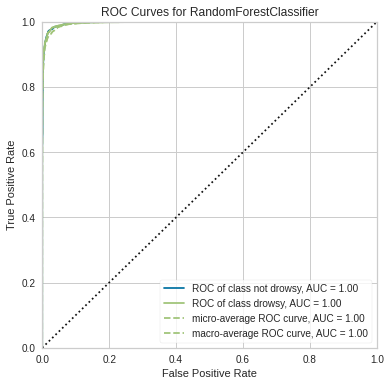

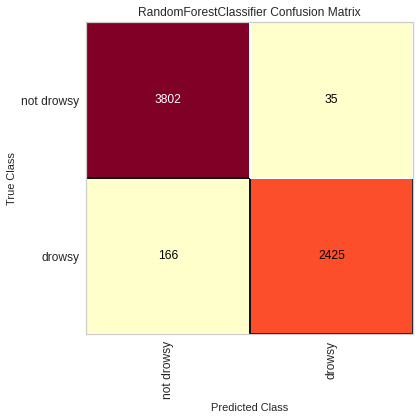

Showing analysis of result for experiment 27 with 3 targets.
              precision    recall  f1-score   support

      active       0.93      0.99      0.96      3400
     neutral       0.98      0.90      0.94      1735
      drowsy       0.99      0.91      0.95      1293

    accuracy                           0.95      6428
   macro avg       0.97      0.94      0.95      6428
weighted avg       0.95      0.95      0.95      6428



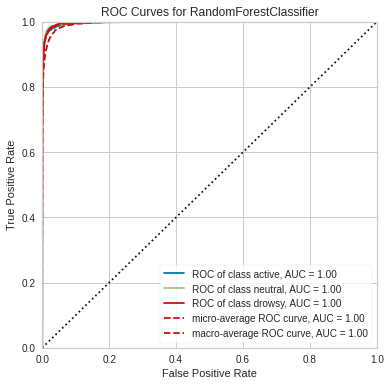

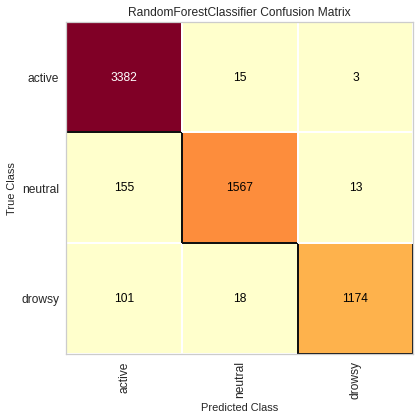

Showing analysis of result for experiment 28 with 5 targets.
                 precision    recall  f1-score   support

          alert       0.98      0.94      0.96      1161
          awake       0.95      0.97      0.96      1667
        neutral       0.98      0.91      0.95      1009
slightly drowsy       0.94      0.99      0.96      2195
         drowsy       0.99      0.84      0.91       396

       accuracy                           0.96      6428
      macro avg       0.97      0.93      0.95      6428
   weighted avg       0.96      0.96      0.96      6428



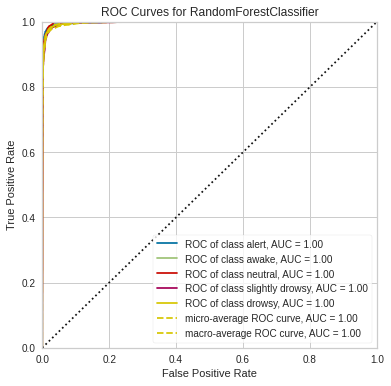

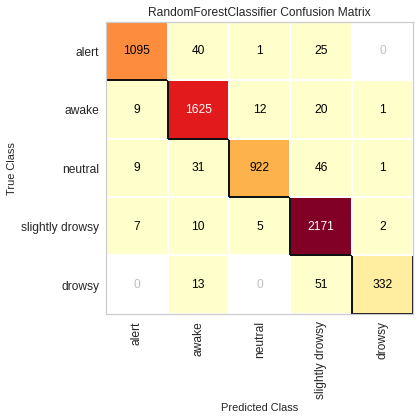

Showing analysis of result for experiment 29 with 9 targets.
              precision    recall  f1-score   support

           1       0.99      0.95      0.97       367
           2       0.98      0.97      0.97       794
           3       0.93      0.98      0.96      1073
           4       0.98      0.95      0.97       594
           5       0.97      0.93      0.95       572
           6       0.98      0.93      0.96       437
           7       0.94      0.98      0.96      1298
           8       0.99      0.97      0.98       897
           9       0.98      0.93      0.95       396

    accuracy                           0.96      6428
   macro avg       0.97      0.96      0.96      6428
weighted avg       0.96      0.96      0.96      6428



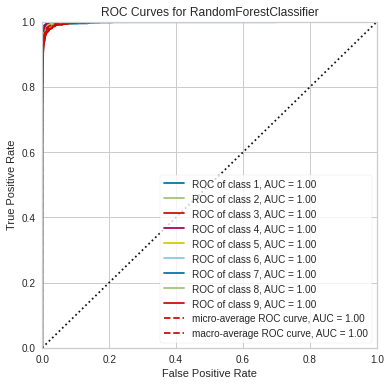

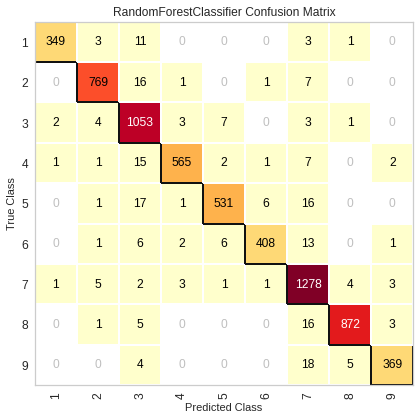

In [16]:
plt.rcParams["figure.figsize"] = 6, 6
# {26,27,28,29} RF, fixed hyperparemeters, num targets from {2,3,5,9}
MULTI_TARGET_EXPERIMENT_IDS = 26, 27, 28, 29

for experiment_id in MULTI_TARGET_EXPERIMENT_IDS:
    exp_config, best_estimator, _ = load_experiment_objects(experiment_id=experiment_id)
    print(
        f"Showing analysis of result for experiment {experiment_id} with {exp_config['num_targets']} targets.")

    window_size = exp_config["window_in_sec"]
    config.set_paths(30, window_size)

    # load data
    X_train, X_test, y_train, y_test = load_preprocessed_train_test_splits(
        data_path=config.PATHS.WINDOW_FEATURES,
        exclude_sess_type=session_type_mapping[exp_config["exclude_by"]],
        num_targets=exp_config["num_targets"],
        seed=exp_config["seed"],
        test_size=exp_config["test_size"])

    # CLASSIFICATION REPORT
    y_hat = best_estimator.predict(X_test)
    report = classification_report(y_true=y_test, y_pred=y_hat,
                                   target_names=label_names_dict[exp_config["num_targets"]], )
    print(report)

    # ROC CURVE
    visualizer = ROCAUC(best_estimator, classes=label_names_dict[exp_config["num_targets"]],
                        is_fitted=True)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()

    # CONFUSION MATRIX
    visualizer = ConfusionMatrix(best_estimator,
                                 classes=label_names_dict[exp_config["num_targets"]],
                                 is_fitted=True)

    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()


### Plot ROC Curve for best RF model of 10,20,60 seconds for 9 targets


Showing analysis of result for experiment 33 with 9 targets.
              precision    recall  f1-score   support

           1       0.61      0.13      0.21       412
           2       0.50      0.44      0.47       831
           3       0.41      0.64      0.50      1171
           4       0.70      0.30      0.42       663
           5       0.70      0.25      0.37       671
           6       0.57      0.25      0.35       493
           7       0.38      0.75      0.51      1418
           8       0.67      0.43      0.52       964
           9       0.63      0.43      0.51       399

    accuracy                           0.47      7022
   macro avg       0.58      0.40      0.43      7022
weighted avg       0.54      0.47      0.45      7022



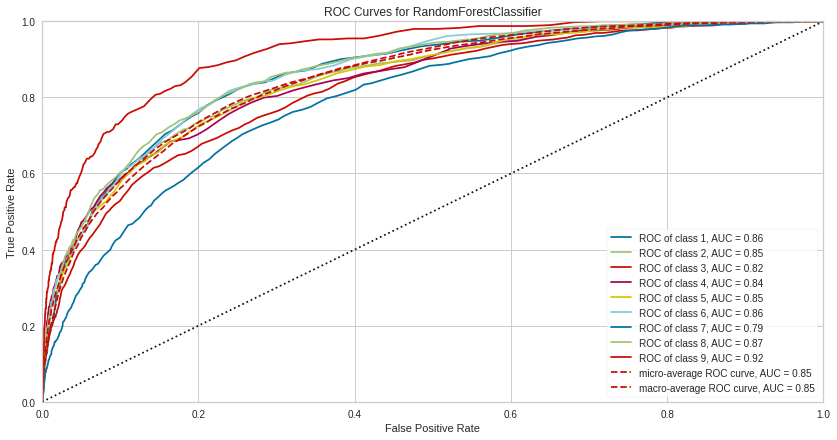

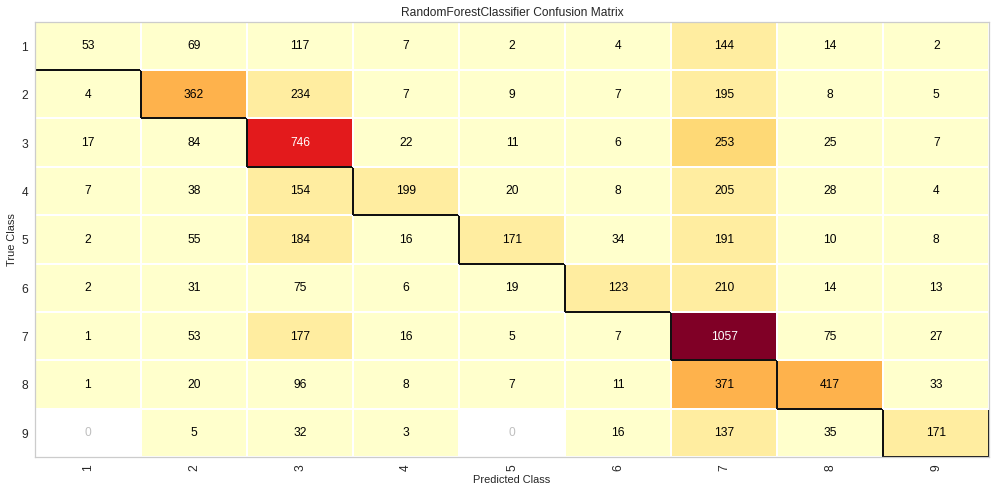

Showing analysis of result for experiment 34 with 9 targets.
              precision    recall  f1-score   support

           1       0.90      0.41      0.56       436
           2       0.65      0.64      0.65       791
           3       0.56      0.76      0.64      1171
           4       0.86      0.49      0.62       626
           5       0.83      0.49      0.61       634
           6       0.77      0.46      0.58       471
           7       0.53      0.87      0.66      1383
           8       0.79      0.66      0.72       949
           9       0.81      0.55      0.65       442

    accuracy                           0.65      6903
   macro avg       0.75      0.59      0.63      6903
weighted avg       0.70      0.65      0.64      6903



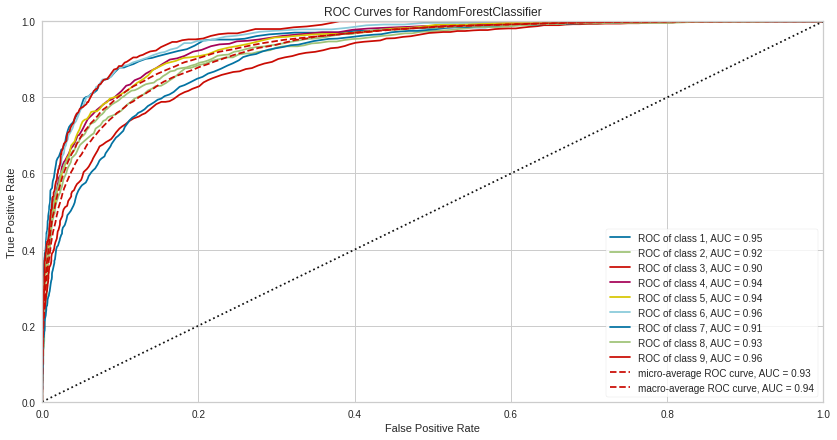

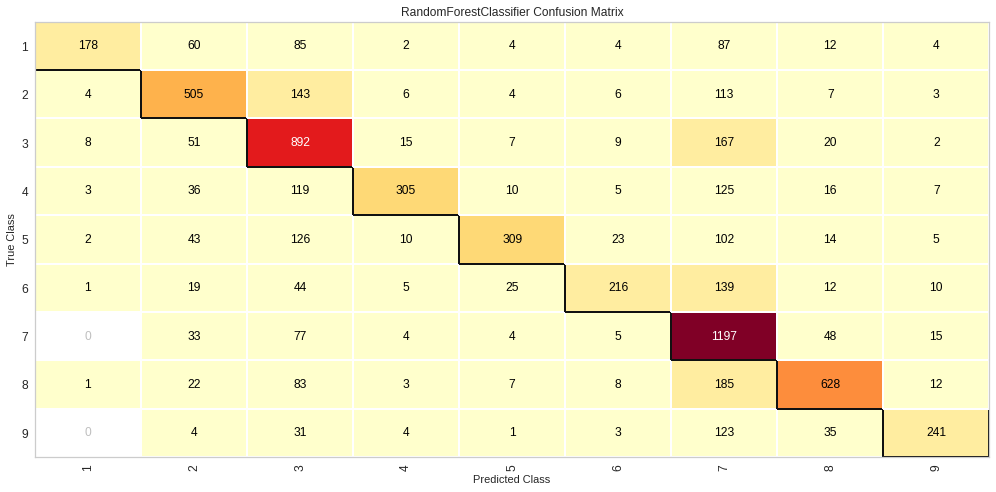

Showing analysis of result for experiment 29 with 9 targets.
              precision    recall  f1-score   support

           1       0.99      0.95      0.97       367
           2       0.98      0.97      0.97       794
           3       0.93      0.98      0.96      1073
           4       0.98      0.95      0.97       594
           5       0.97      0.93      0.95       572
           6       0.98      0.93      0.96       437
           7       0.94      0.98      0.96      1298
           8       0.99      0.97      0.98       897
           9       0.98      0.93      0.95       396

    accuracy                           0.96      6428
   macro avg       0.97      0.96      0.96      6428
weighted avg       0.96      0.96      0.96      6428



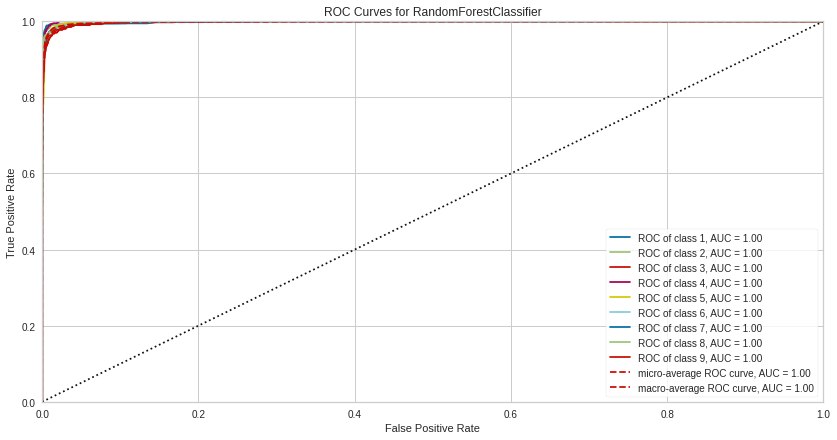

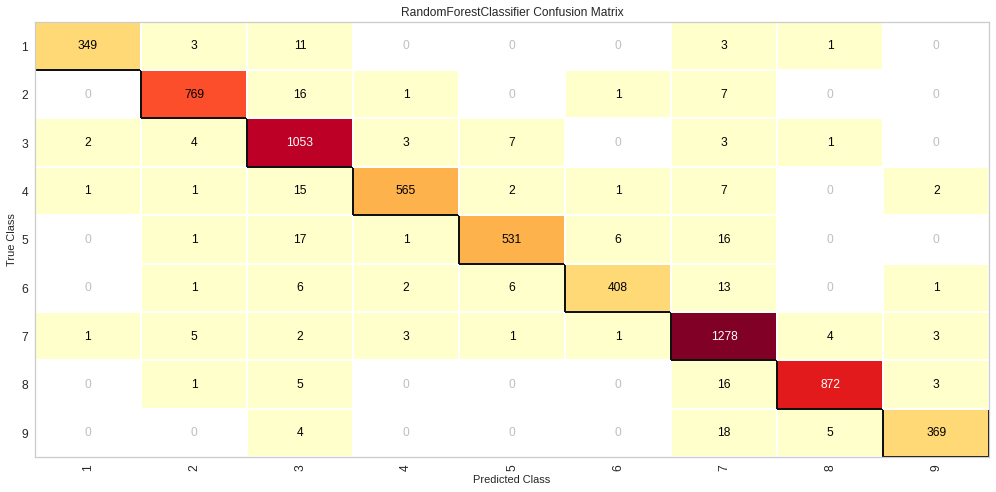

In [6]:
fig, ax = plt.subplots()
EXPERIMENT_IDS = (33, 34, 29)

for experiment_id in EXPERIMENT_IDS:
    exp_config, best_estimator, _ = load_experiment_objects(experiment_id=experiment_id)
    print(
        f"Showing analysis of result for experiment {experiment_id} with {exp_config['num_targets']} targets.")

    window_size = exp_config["window_in_sec"]
    config.set_paths(30, window_size)

    # load data
    X_train, X_test, y_train, y_test = load_preprocessed_train_test_splits(
        data_path=config.PATHS.WINDOW_FEATURES,
        exclude_sess_type=session_type_mapping[exp_config["exclude_by"]],
        num_targets=exp_config["num_targets"],
        seed=exp_config["seed"],
        test_size=exp_config["test_size"])

    # CLASSIFICATION REPORT
    y_hat = best_estimator.predict(X_test)
    report = classification_report(y_true=y_test, y_pred=y_hat,
                                   target_names=label_names_dict[exp_config["num_targets"]], )
    print(report)

    # ROC CURVE
    visualizer = ROCAUC(best_estimator, classes=label_names_dict[exp_config["num_targets"]],
                        is_fitted=True)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()

    # CONFUSION MATRIX
    visualizer = ConfusionMatrix(best_estimator,
                                 classes=label_names_dict[exp_config["num_targets"]],
                                 is_fitted=True)

    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()